### course : DATA 690
# Final Project - Career Catalyst: NLP Analysis for Job Matching
### GI67216 JAINAM MAHESHKUMAR PATEL

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy.sparse import hstack
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from nltk.tokenize import word_tokenize
from collections import Counter

In [28]:
df = pd.read_csv('Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


# EDA

In [29]:
category = df['Category'].value_counts().reset_index()
print(category[:5])

                 Category  count
0  INFORMATION-TECHNOLOGY    120
1    BUSINESS-DEVELOPMENT    120
2                 FINANCE    118
3                ADVOCATE    118
4              ACCOUNTANT    118


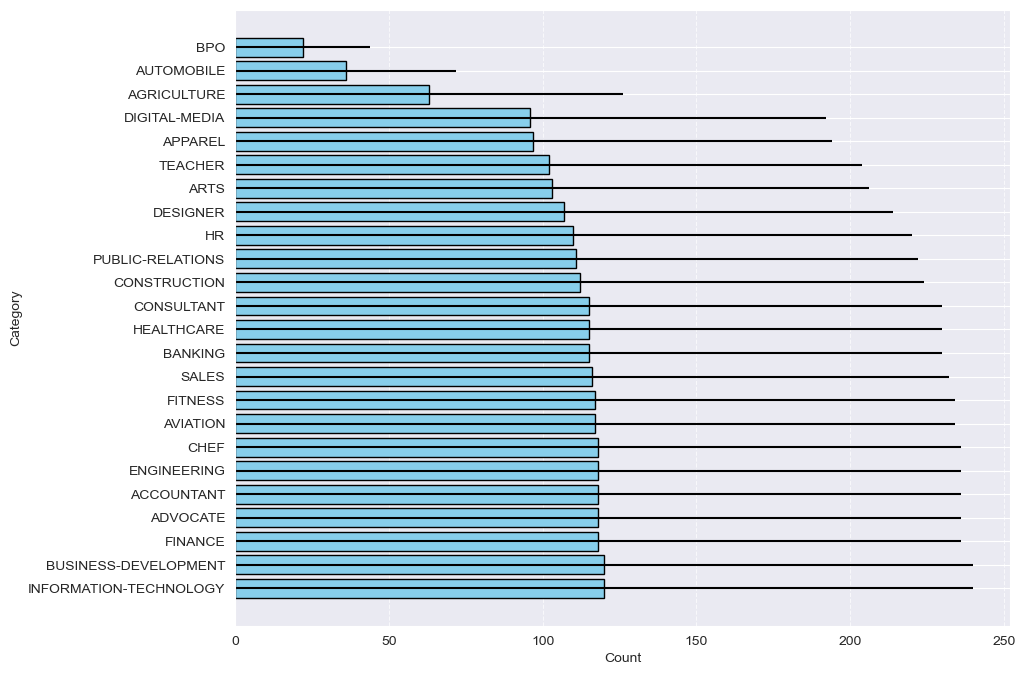

In [30]:
# this is the horizontal bar chart with error bars......
plt.figure(figsize=(10, 8))
plt.barh(category['Category'], category['count'], xerr=category['count'], color='skyblue', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [31]:
# here i added a error handling piechart.....
def plot_pie_chart(data):
    
    
    # here is the error handling for key existence
    if 'count' not in data or 'Category' not in data:
        raise KeyError("The DATASET must contain 'count' and 'Category' keys.")
    
    # Pie chart parameters
    counts = df['count']
    categories = df['Category']
    colors = plt.cm.Paired(range(len(categories)))
    


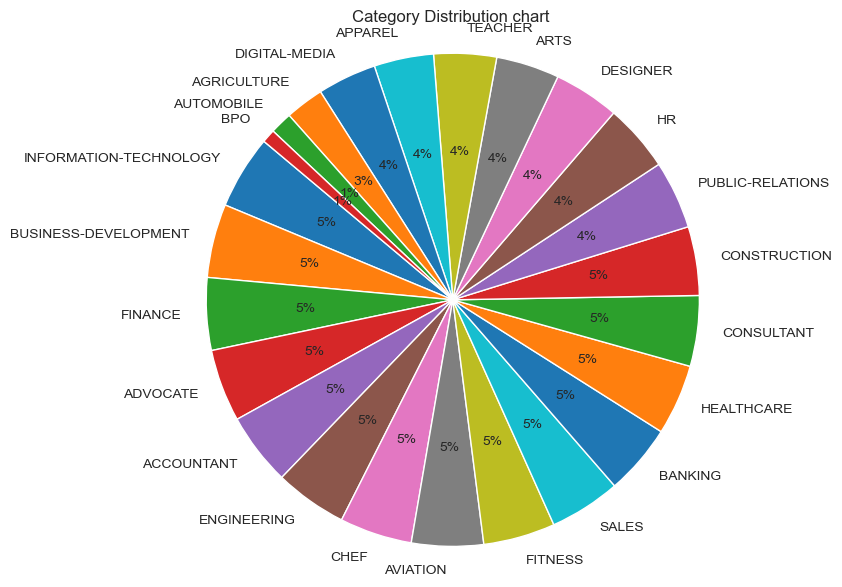

In [32]:
import matplotlib.pyplot as plt

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(category['count'], labels=category['Category'], autopct='%.0f%%', startangle=140)
plt.title('Category Distribution chart ')
plt.axis('equal')  
plt.show()


# Data Cleaning

In [33]:
import re

def cleaningResume(resumeText):
    # Define patterns for cleaning
    patterns = [
        (r'http\S+\s*', ''),      # Remove URLs
        (r'RT|cc', ''),            # Remove RT and cc
        (r'#\S+', ''),             # Remove hashtags
        (r'@\S+', '  '),           # Remove mentions
        (r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' '),  # Remove punctuations
        (r'[^\x00-\x7f]', ' '),    # Remove non-ASCII characters
        (r'\s+', ' '),             # Remove extra whitespace
    ]

    
    for pattern, replacement in patterns:
        resumeText = re.sub(pattern, replacement, resumeText)

    return resumeText


In [39]:
df['cleaned'] = df['Resume_str'].apply(lambda x:cleaningResume(x))
df.head()

,ID,Resume_str,Resume_html,Category,Category_encoded,cleaned
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,19,HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMIN...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,19,HR SPECIALIST US HR OPERATIONS Summary Versat...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,19,HR DIRECTOR Summary Over 20 years experience ...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,19,HR SPECIALIST Summary Dedicated Driven and Dy...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,19,HR MANAGER Skill Highlights HR SKILLS HR Depa...


In [40]:
corpus=" "
for i in range(0,len(df)):
    corpus= corpus+ df["cleaned"][i]

In [41]:
import nltk
from nltk.tokenize import RegexpTokenizer

# here i initialize the regex tokenizer......
tokenizer = RegexpTokenizer(r'\w+')

# this is for Tokenize the corpus.....
tokens = tokenizer.tokenize(corpus)

# here i display the first 50 tokens as an example.....
print(tokens[:50])


['HR', 'ADMINISTRATOR', 'MARKETING', 'ASSOCIATE', 'HR', 'ADMINISTRATOR', 'Summary', 'Dedicated', 'Customer', 'Service', 'Manager', 'with', '15', 'years', 'of', 'experience', 'in', 'Hospitality', 'and', 'Customer', 'Service', 'Management', 'Respected', 'builder', 'and', 'leader', 'of', 'customer', 'focused', 'teams', 'strives', 'to', 'instill', 'a', 'shared', 'enthusiastic', 'commitment', 'to', 'customer', 'service', 'Highlights', 'Focused', 'on', 'customer', 'satisfaction', 'Team', 'management', 'Marketing', 'savvy', 'Conflict']


In [42]:
tokens_lower = [token.lower() for token in tokens]

# the first 50 lowercase tokens as an example......
print(tokens_lower[:50])

['hr', 'administrator', 'marketing', 'associate', 'hr', 'administrator', 'summary', 'dedicated', 'customer', 'service', 'manager', 'with', '15', 'years', 'of', 'experience', 'in', 'hospitality', 'and', 'customer', 'service', 'management', 'respected', 'builder', 'and', 'leader', 'of', 'customer', 'focused', 'teams', 'strives', 'to', 'instill', 'a', 'shared', 'enthusiastic', 'commitment', 'to', 'customer', 'service', 'highlights', 'focused', 'on', 'customer', 'satisfaction', 'team', 'management', 'marketing', 'savvy', 'conflict']


In [43]:
# here i initialize the LabelEncoder
label_encoder = LabelEncoder()

# here i encode the 'Category' column.....
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

# here i am displaying the encoded categories along with their original counterparts.....
encoded_categories = pd.DataFrame({'Category': df['Category'], 'Encoded Category': df['Category_encoded']})
print(encoded_categories.head())


  Category  Encoded Category
0       HR                19
1       HR                19
2       HR                19
3       HR                19
4       HR                19


# Vectorising the cleaned columns

In [44]:
# here i initialize the TfidfVectorizer....
tfidf_vectorizer = TfidfVectorizer()

# here i tried to fit and transform the 'cleaned' column....
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned'])

# TF-IDF matrix shape.....
print("TF-IDF MATRIX Shape:", tfidf_matrix.shape)


TF-IDF MATRIX Shape: (2484, 40335)


In [45]:
print(tfidf_matrix)

  (0, 28692)	0.024165655545404553
  (0, 28357)	0.048287711017574175
  (0, 21300)	0.035692753157948294
  (0, 2650)	0.04047189683569526
  (0, 32348)	0.03546561563870855
  (0, 33241)	0.07104641779692178
  (0, 3448)	0.026425022461922486
  (0, 4960)	0.031554182145039016
  (0, 32755)	0.019161479887274374
  (0, 16302)	0.06750090810504523
  (0, 31981)	0.07104641779692178
  (0, 582)	0.027231905419847373
  (0, 34965)	0.025908984675676455
  (0, 28640)	0.036580032845521374
  (0, 11818)	0.022835327214538067
  (0, 32353)	0.016319105645311874
  (0, 8813)	0.04870747782381084
  (0, 20154)	0.1093576254523592
  (0, 2592)	0.03542638011269531
  (0, 6831)	0.025221119028073447
  (0, 13001)	0.008911272042883198
  (0, 583)	0.0516186668450201
  (0, 4745)	0.033006270131234035
  (0, 9767)	0.023494205511772292
  (0, 19387)	0.030309238432010232
  :	:
  (2483, 19638)	0.18770753593310643
  (2483, 35608)	0.01382853149257677
  (2483, 4342)	0.06264860590844556
  (2483, 35618)	0.04245723185576986
  (2483, 15504)	0.071823

In [46]:
# here i define features (X) and target variable (y).....
X = tfidf_matrix  # Using the TF-IDF matrix as features
y = df['Category_encoded']  

# here i tried to split the data into training and testing sets (80% train, 20% test).....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1987, 40335)
X_test shape: (497, 40335)
y_train shape: (1987,)
y_test shape: (497,)


### KNN

In [47]:
# here i initialize the K-Nearest Neighbors (KNN) classifier....
knn_classifier = KNeighborsClassifier()

# here trained the classifier on the training data....
knn_classifier.fit(X_train, y_train)

# predicted labels for the test data here......
y_pred = knn_classifier.predict(X_test)

# accuracy....
accuracy = accuracy_score(y_test, y_pred)
print("ACCURACY:", accuracy)


ACCURACY: 0.46277665995975853


In [48]:
# here i calculate classification report....
classification_rep = classification_report(y_test, y_pred)
print("CLASSIFICATION Report:\n", classification_rep)



CLASSIFICATION Report:
               precision    recall  f1-score   support

           0       0.51      0.86      0.64        29
           1       0.31      0.43      0.36        30
           2       0.17      0.12      0.14         8
           3       0.27      0.35      0.30        20
           4       0.30      0.17      0.21        18
           5       0.17      0.17      0.17         6
           6       0.63      0.57      0.60        21
           7       0.73      0.35      0.47        23
           8       0.00      0.00      0.00         2
           9       0.35      0.67      0.46        27
          10       0.94      0.62      0.75        24
          11       0.92      0.65      0.76        34
          12       0.06      0.15      0.09        20
          13       0.63      0.63      0.63        19
          14       0.75      0.48      0.59        25
          15       0.62      0.48      0.54        21
          16       0.50      0.26      0.34        19
   

### RANDOM FOREST 

In [49]:
# here i did the same thing with random forest....
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6016096579476862
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.97      0.79        29
           1       0.73      0.53      0.62        30
           2       0.33      0.12      0.18         8
           3       0.44      0.40      0.42        20
           4       0.40      0.11      0.17        18
           5       0.00      0.00      0.00         6
           6       0.63      0.81      0.71        21
           7       0.64      0.61      0.62        23
           8       0.00      0.00      0.00         2
           9       0.75      0.44      0.56        27
          10       0.71      0.71      0.71        24
          11       0.89      0.74      0.81        34
          12       0.56      0.25      0.34        20
          13       0.71      0.89      0.79        19
          14       0.64      0.64      0.64        25
          15       0.54      0.62      0.58        21
          16   

### LOGISTIC REGRESSION

In [50]:
# here i did the same thing with Logistic Regression......
logreg_classifier = LogisticRegression(random_state=42)

logreg_classifier.fit(X_train, y_train)

y_pred_logreg = logreg_classifier.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.6237424547283702
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.55      0.60      0.57        30
           2       0.33      0.12      0.18         8
           3       0.54      0.35      0.42        20
           4       0.07      0.06      0.06        18
           5       0.00      0.00      0.00         6
           6       0.67      0.86      0.75        21
           7       0.73      0.70      0.71        23
           8       0.00      0.00      0.00         2
           9       0.76      0.59      0.67        27
          10       0.85      0.71      0.77        24
          11       0.90      0.76      0.83        34
          12       0.44      0.20      0.28        20
          13       0.75      0.79      0.77        19
          14       0.94      0.60      0.73        25
          15       0.47      0.67      0.55        21
         

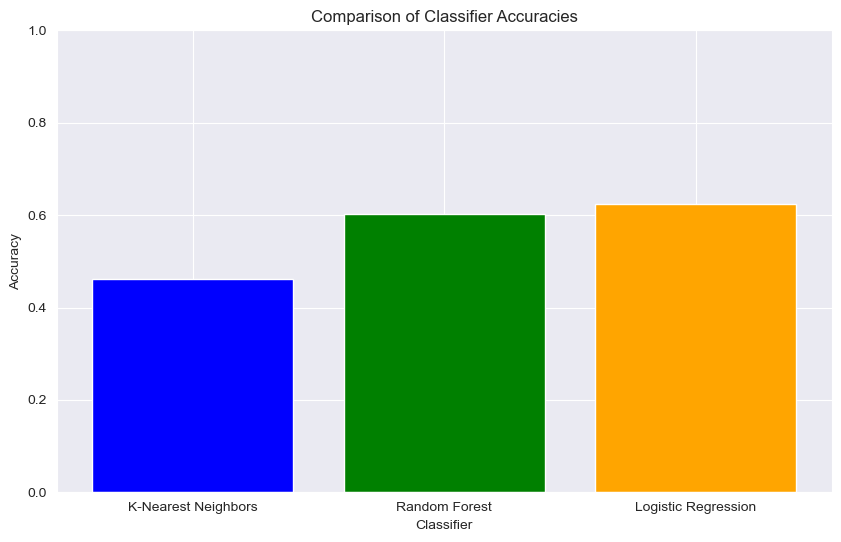

In [51]:
# accuracies of the classifiers......
accuracies = [accuracy, accuracy_rf, accuracy_logreg]
classifiers = ['K-Nearest Neighbors', 'Random Forest', 'Logistic Regression']

# plotting the accuracies......
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.show()


# Key words Extractions

In [52]:
# here i initialize the regex tokenizer.....
tokenizer = RegexpTokenizer(r'\w+')

# here i tokenized the corpus.....
tokens = tokenizer.tokenize(corpus)

# here i initialize English stopwords from NLTK.....
stopwords_list = stopwords.words('english')

# here i tried to filter out stopwords from tokens.....
tokens_new = [token for token in tokens if token.lower() not in stopwords_list]

# example....
print(tokens_new[:50])



['HR', 'ADMINISTRATOR', 'MARKETING', 'ASSOCIATE', 'HR', 'ADMINISTRATOR', 'Summary', 'Dedicated', 'Customer', 'Service', 'Manager', '15', 'years', 'experience', 'Hospitality', 'Customer', 'Service', 'Management', 'Respected', 'builder', 'leader', 'customer', 'focused', 'teams', 'strives', 'instill', 'shared', 'enthusiastic', 'commitment', 'customer', 'service', 'Highlights', 'Focused', 'customer', 'satisfaction', 'Team', 'management', 'Marketing', 'savvy', 'Conflict', 'resolution', 'techniques', 'Training', 'development', 'Skilled', 'multi', 'tasker', 'Client', 'relations', 'specialist']


# lemmatization

In [53]:
# here i followed same steps as above but just added the lemmatizer......
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(corpus)
stopwords_list = stopwords.words('english')
tokens_filtered = [token for token in tokens if token.lower() not in stopwords_list]

# here i initialize WordNet Lemmatizer.....
lemmatizer = WordNetLemmatizer()

# lemmatized the tokens.....
tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens_filtered]

# example......
print(tokens_lemmatized[:50])


['HR', 'ADMINISTRATOR', 'MARKETING', 'ASSOCIATE', 'HR', 'ADMINISTRATOR', 'Summary', 'Dedicated', 'Customer', 'Service', 'Manager', '15', 'year', 'experience', 'Hospitality', 'Customer', 'Service', 'Management', 'Respected', 'builder', 'leader', 'customer', 'focused', 'team', 'strives', 'instill', 'shared', 'enthusiastic', 'commitment', 'customer', 'service', 'Highlights', 'Focused', 'customer', 'satisfaction', 'Team', 'management', 'Marketing', 'savvy', 'Conflict', 'resolution', 'technique', 'Training', 'development', 'Skilled', 'multi', 'tasker', 'Client', 'relation', 'specialist']


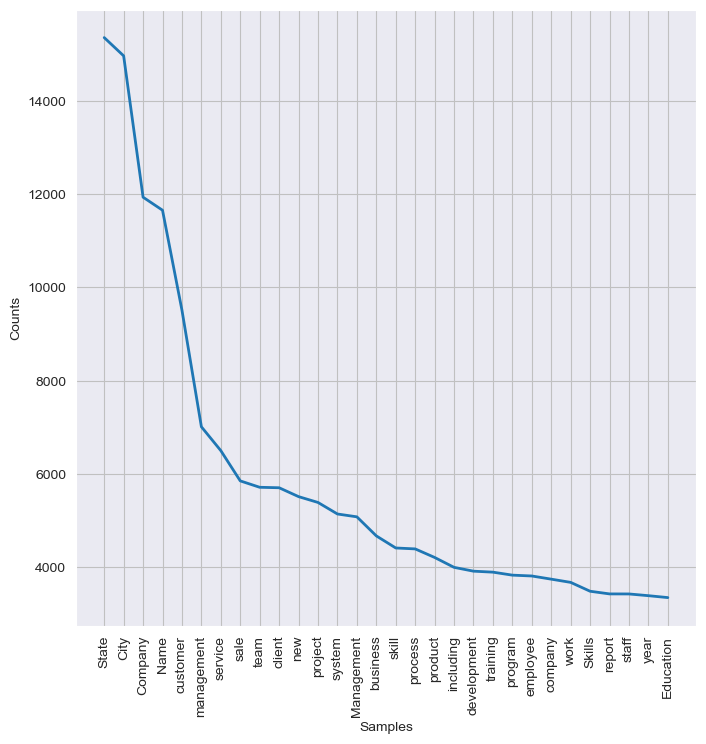

<Axes: xlabel='Samples', ylabel='Counts'>

In [54]:
freq_dist = nltk.FreqDist(tokens_lemmatized)

# here is the Frequency Distribution Plot....
plt.subplots(figsize=(8,8))
freq_dist.plot(30)

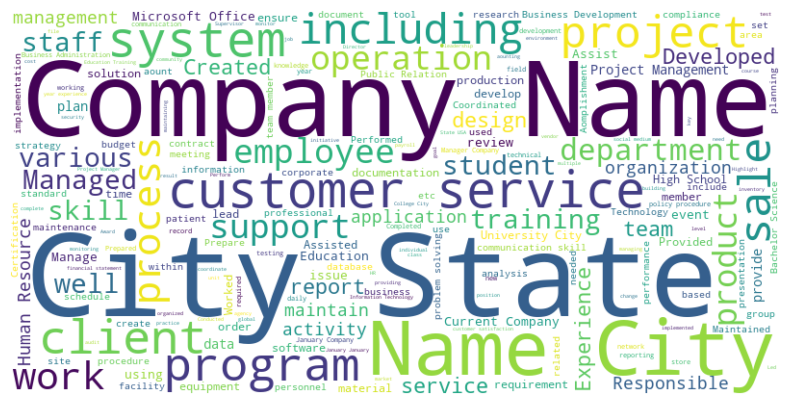

In [55]:
# here i joined the lemmatized words into a single string....
text = ' '.join(tokens_lemmatized)

# i generated the word cloud.....
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [56]:
# here we entered resume text for sample to check similartiy.....
entered_resume = """
HR MANAGER         Summary      Human Resources Manager with practical understanding of business needs. Areas of expertise include conflict management and employee training.  Human Resources Generalist who promotes a team-oriented and open-door environment that is conducive to a successful staff. Offering  [Number]  years of experience and knowledge in training, orientation learning and incentive processing program creation.   [level of management] -level ma Human Resource executive who works with other executives to translate Python business strategies into HR actions Machine that drive business results.  nager with Programming  [years of experience]  years of managerial experience. Strong strategic-planning and people-management skills.         Highlights          Compensation/payroll  Regulatory compliance  Staff development  Compensation/benefits administration  Policy/program development  Salary structure/compensation analysis      Performance management strategies  Interviewing expertise  Staffing and recruiting professional  Hiring and retention  Training and development  Employee relations            Experience      Company Name    City  ,   State    HR Manager   04/2016   to   Current       Sunningdale Tech (Thailand) Co.,Ltd. .   Type of business	: 	Tooling and Plastic Injection.          Company Name    City  ,   State    HR & Admin.Manager   09/2013   to   04/2015       Responsibility	:	Report directly to CEO Transformed HR from administrative role to strategic business partner, including working with management level to drive key business and implement performance initiative, conducted extensive analysis of existing HR Organization and Development business plan to up dated all policies, procedure, service, program and operation.  Direct HR function including recruiting, hiring practice, benefit and Compensation.  Develop standardized organizational model to clarify authority and responsibilities.  Learning and development as providing guidance on learning and development for manager and their team as well as set up training system, implementing and identify areas that need to attention and improvement.  Ensure legal compliance by monitoring and implementing applicable labor law requirements, conducting investigation, maintaining record, representing the organization at hearing.  Deal with complex disciplinary/grievance and HR issues, using HR and company knowledge evidencing appropriate decision making skills Overseeing and manage all administrative activities of the company, ensuring that all work processes are maximized for efficiency.  Sekisui s - lec  ( Thailand ) Co., Ltd.  ESIE, Rayong ) Type of business 	:	PVB Interlayer Film for Laminated Glass.          Company Name    City  ,   State    General Administration Asst. Chief   11/2002   to   09/2013       One year  break for living abroad ) Promoted to fulfill a broad range of HR functions, including Purchasing and General Administration to ensuring that meet the company's goal Human Resource Handle and Played a key role in ensuring the successful of a full spectrum of all HR Operation system and program :- Recruitment and Selection ; Managed recruitment process in an effective and efficient manner Maintain up-to-date recruitment progress and implemented a reporting process on manpower concerns.  Coordinates, negotiates and liaises with employment and advertising agent on service fee, advertisement recruitment and interview schedules.  Conducts interview up to executive levels and arranges interviews for management levels.  Managing orientation program for employee to the business and culture Training and Development ; Identify key skills, specialty skills and propose training needs accordingly Responsible for developing and maintaining standard, developing and meeting objectives, continuous improvement of department operations, developing strategic plans to meet company goals, and managing assigned staff.  Compensation and benefits ; Monitor and alert division manager to any variance of any concerns issues.  Compile all data needed for the annual salary review, annual performance appraisal analysis and promotion, annual bonus.  Improve and Implemented a performance measurement and development.  Supervise and manage all HR function generalist and other job as assign by Division Manager Purchasing Supervise and manage all purchasing function both Oversea & Domestic and other concerns.  Supervise and lead the procurement group in all phases.  Prepare purchase requisitions, initiative to approve and issues purchase orders in accordance with company policy and negotiated terms and conditions.  Other job as assign by Division Manager General Administration Managerial Overseeing all administrative activities of the company, ensuring that all work processes are maximized for efficiency.  Contributes to team effort by accomplishing related results as needed.  To supervise general administrative support and serve as a general resource for all direct inquiries from a wide variety requestors Planning and scheduling projects and ensuring timely completion Work closely to General Administration Manager and perform executive administrative tasks with supporting all the requestors from both internal and external Coordinating workflow and maintaining a productive work environment Develop and recommend administrative processes and procedures to assure efficiency Work closely with the Administrative Manager to coordinate efforts towards meeting deadlines and clarifying priorities Establish processes and schedules to ensure all required submissions are made accurately and in a timely manner Respond to and initiate inquiries (questions regarding purchasing, personnel, facilities, administration, specialized programs, etc.).  Explain policies, answer questions, and independently resolve problems wheneverfeasible.          Company Name    General Manager and HR Director      As the HR Manager, will take responsibility for conceptualizing and spearheading new HR initiatives, development and management of an effective and responsive human resource functions, as well as leading the HR team in the full spectrum of human resource activities as ; Formulate and implement human resource policies and procedures in line with the company's business goals Manage compensation and staff benefits programmes including leave management Develop and implement performance appraisal and performance management systems for all levels of staff in line with the company objectives Manage recruitment and selection activities to meet the manpower requirements of all the departments Assess short and long term training needs as well as plan and direct training and development programmes to raise the competency of  employees Oversee payroll administration and submit all necessary statutory reports to the relevant authorities Handle grievances and disciplinary matters Plan and carry out company events to foster harmonious working environment Conduct exit interviews, analyse turnover determinants and implement appropriate corrective actions Overseeing and manage all administrative activities of the company, ensuring that all work processes are maximized for efficiency.  Type of business 	:	Steel and Metal Worksheet.          Education      Master of Public Administration     2012     National Institute of Development Administration (NIDA)                  Comprehensive English Course under Cultural Exchange Program     2007       City  ,   State  ,   USA            Bachelor of Education     2002     Chulalongkorn University                  Accomplishments      Complete ongoing training in the areas of :- Human Resource Management (PM and APM Certification Course) Analytical Problem Solving and Prevention 			* Tax ISO/TS 16949 & ISO 14001 requirements			* Leadership Competency and Work Performance Appraisal		* Labor Law Balance Scorecard and KPI 					* Happy Work Place Welfare and Salary Structure					* Recruitment Compensation and Benefit Corrective and Preventive Action By 8D report and Why Why Analysis Technique Safety Supervisor Level Software Expertise Efficient in MS Office package and surfing internet.        Skills    Administrative, administrative support, advertising, as set, benefits, business plan, clarify, Good communication skills, Interpersonal Skills, continuous improvement, decision making, English, Film, hiring, Human Resource, HR, law, legal compliance, Managerial, Managing, Exchange, organizational, payroll, performance appraisal, performance management, personnel, policies, processes, procurement, progress, promotion, speaking, purchase requisitions, Purchasing, Recruitment, recruiting, reporting, scheduling, strategic, strategic plans, Type, workflow"""

import re

def cleaningResume(resumeText):
    # Define patterns for cleaning
    patterns = [
        (r'http\S+\s*', ''),      # Remove URLs
        (r'RT|cc', ''),            # Remove RT and cc
        (r'#\S+', ''),             # Remove hashtags
        (r'@\S+', '  '),           # Remove mentions
        (r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' '),  # Remove punctuations
        (r'[^\x00-\x7f]', ' '),    # Remove non-ASCII characters
        (r'\s+', ' '),             # Remove extra whitespace
    ]

    
    for pattern, replacement in patterns:
        resumeText = re.sub(pattern, replacement, resumeText)

    return resumeText


# here tokenize the entered resume text....
resume_tokens = word_tokenize(entered_resume.lower())  

# here i calculate word frequency in the resume.....
word_freq = Counter(resume_tokens)

# here i display the top keywords in the entered resume....
print("Top Keywords in ENTERED Resume:")
for word, freq in word_freq.most_common(10):  
    print(f"{word}: {freq}")

# here i compared keywords in the entered resume with top keywords.....
matched_keywords = [word for word in resume_tokens if word in tokens_lemmatized]

# here i tried to remove common words occurring more than once in matched_keywords.....
matched_keywords_unique = [word for word, count in Counter(matched_keywords).items() if count == 1]

# here i displayed matched keywords.....
print("\nMatched KEYWORDS with TOP KEYWORDS:")
print(matched_keywords_unique)


# here i created vectors to calculate cosine similarity between matched keywords and top keywords........
vector1 = np.zeros(len(tokens_lemmatized))  
vector2 = np.zeros(len(tokens_lemmatized))  

# here i populate vectors with frequency counts.....
for i, word in enumerate(tokens_lemmatized):
    vector1[i] = word_freq[word]
    vector2[i] = matched_keywords.count(word)

# here i reshape vectors to 2D arrays for cosine similarity calculation....
vector1 = vector1.reshape(1, -1)
vector2 = vector2.reshape(1, -1)

# here i calculate cosine similarity......
cosine_sim = cosine_similarity(vector1, vector2)

# cosine similarity......
print(f"\nCOSINE Similarity between MATCHED Keywords and TOP Keywords: {cosine_sim[0][0]:.2f}")



Top Keywords in ENTERED Resume:
and: 93
,: 87
.: 35
to: 29
of: 27
the: 21
all: 18
hr: 17
company: 14
as: 14

Matched KEYWORDS with TOP KEYWORDS:
['summary', 'practical', 'understanding', 'include', 'conflict', 'promotes', 'conducive', 'offering', 'number', 'incentive', 'processing', 'creation', 'ma', 'translate', 'python', 'machine', 'nager', 'programming', 'strong', 'regulatory', 'interviewing', 'staffing', 'professional', 'retention', 'current', 'tech', 'tooling', 'plastic', 'injection', 'directly', 'transformed', 'partner', 'conducted', 'extensive', 'existing', 'dated', 'procedure', 'practice', 'standardized', 'model', 'authority', 'providing', 'guidance', 'need', 'attention', 'monitoring', 'applicable', 'conducting', 'investigation', 'record', 'representing', 'hearing', 'deal', 'complex', 'using', 'evidencing', 'lec', 'glass', 'asst', 'chief', 'one', 'year', 'break', 'living', 'abroad', 'promoted', 'fulfill', 'broad', 'range', 'goal', 'played', 'managed', 'maintain', 'negotiates', 

### CONCLUSION


Resumes were taken further to use the techniques followed in natural language processing. The below were the major steps:

**Data cleaning and preparation:** The first step is to tokenize resumes and clean them by removing URLs, hashtags, mentions, and punctuation. The next step does the normalization of the words in the resumes using lemmatization.

**Feature extraction:** The cleaned lemmatized text data were used in numerical data using TF-IDF vectorization techniques, and these features were further split into training and testing sets.

**Model training:** Next, classification models were built using K-Nearest Neighbors (KNN), Random Forest, and Logistic Regression with training and testing data for the TF-IDF features.

**Keyword extraction:** The top keywords were extracted from the TF-IDF matrix. The key idea was to identify the most important words used in resumes.

**Resume analysis:** The entered resume text was tokenized, and keywords are extracted. This way, one can compare them to the top keywords from the analysis. Resume helps in finding common keywords and checking the relevance of the entered resume with the job description.

Lastly, this project illustrated how multiple NLP algorithms analyze a resume, extract key information, and suggest data-driven decisions in recruitment and job finding.
At the End , the project demonstrated how NLP techniques can be applied to analyze resumes, extract key information, and make data-driven decisions in recruitment and job matching processes.

#### reference - dataset from https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset